In [19]:
import cv2
from cv2 import sqrt
import numpy as np
import os
import matplotlib.pyplot as plt
import statistics
from mpl_toolkits.mplot3d import Axes3D


In [26]:
def DeleteTrash(pathTxtFile):
    with open (pathTxtFile, 'r') as f:
        old_data = f.read()
        new_data = old_data.replace('[', '')
        new_data = new_data.replace(']', '')
        new_data = new_data.replace(',', '')
        new_data = new_data.replace(';', '')
        new_data = new_data.replace('(', '')
        new_data = new_data.replace(')', '')
    with open (pathTxtFile, 'w') as f:
        f.write(new_data)

In [27]:
DeleteTrash(r"./BallDetectorLog48videoCycles.txt") 
FindCord = np.loadtxt(r"./BallDetectorLog48videoCycles.txt")

BlenderCord = np.loadtxt(r"./LogBlenderCoordVideo48.txt", delimiter=',')
#BlenderCord[:,2] = BlenderCord[:,2] +  0.05

if (FindCord.shape != BlenderCord.shape):
    print("Error dementions")
    print(FindCord.shape)
    print(BlenderCord.shape)
    
cameraMatrix = np.array( [ 
    [2666.6666666666665, 0, 960.0],
    [0, 2666.6666666666665, 540.0], 
    [0, 0, 1] 
    ] )
cameraMatrixV2 = np.array( [
    [2666.6666666666665, 0, 959.5],
    [0, 2666.6666666666665, 539.5], 
    [0, 0, 1] 
    ] )
distCoeffs = np.array( [ 0.0,0.0,0.0,0.0 ] )
Rx = np.array([
    [ -1.0, 0.0, 0.0],
    [ 0.0, -1.0, 0.0],
    [ 0.0, 0.0, 1.0] 
    ])# Rotation matrix
T = np.array([ 0.0, 0.0, 0.0]) #Transpose matrix

rvecR, jacobianRotation = cv2.Rodrigues(Rx)

In [35]:
# создаем функцию распределения
def distribution_function(x, values):
    count = 0
    for i in values:
        if i <= x:
            count += 1
    return count / len(values)

def ErrorEstimation(FindCord, BlenderCord, rvecR, T, cameraMatrix, distCoeffs, draw=False):
    xErrorFindCord = FindCord[:,0] - BlenderCord[:,0]
    yErrorFindCord = FindCord[:,1] - BlenderCord[:,1]
    zErrorFindCord = FindCord[:,2] - BlenderCord[:,2]

    imageFindPoint, jacobianProjectFind = cv2.projectPoints(FindCord, rvecR, T, cameraMatrix, distCoeffs)
    imageBlenderPoint, jacobianProjectBlender = cv2.projectPoints(BlenderCord, rvecR, T, cameraMatrix, distCoeffs)
    pixelError = imageBlenderPoint - imageFindPoint
    xErrorValuesPx = pixelError[:,0,0]
    yErrorValuesPx = pixelError[:,0,1]

    print ("xyz Real cordinate mean: ")
    print (np.mean(xErrorFindCord))
    print (np.mean(yErrorFindCord))
    print (np.mean(zErrorFindCord))
    print("------------------")
    print("Px cordinate mean")
    print(np.mean(xErrorValuesPx))
    print(np.mean(yErrorValuesPx))
    print(" ")
    print("max px error: x = ", max(abs(xErrorValuesPx)), " y = ", max(abs(yErrorValuesPx)), '\n')
    #print ("Statistics mean:  ", statistics.mean(xErrorValuesPx), " error in px " ) 
    Sigma = statistics.stdev(xErrorValuesPx)
    print ("Statistics stdev:  ", Sigma, " error in px" )
    print ("Statistics stdev:  ", statistics.stdev(xErrorFindCord), " error x" )
    print ("Statistics stdev:  ", statistics.stdev(yErrorFindCord), " error y" )
    print ("Statistics stdev:  ", statistics.stdev(zErrorFindCord), " error z" )
    print("-------------------------------------------------------------------")
    print("mean xyz abs: " )
    print (np.mean(abs(xErrorFindCord)) ) 
    print (np.mean(abs(yErrorFindCord))) 
    print (np.mean(abs(zErrorFindCord))) 

    if draw:
        plt.plot(xErrorFindCord, label = 'x error')
        plt.plot(yErrorFindCord, label = "y error")
        plt.plot(zErrorFindCord, label = "z error")
        plt.legend()
        plt.xlabel('Frame')
        plt.ylabel('Error in meters')
        plt.title(" Real cordinate error")
        plt.show()

        plt.plot(xErrorValuesPx, label = "X px error")
        plt.plot(yErrorValuesPx, label = "Y px error")
        plt.xlabel('Frame')
        plt.ylabel('Error in px')
        plt.legend()
        plt.show()

        plt.hist(yErrorFindCord,alpha = 0.5, bins=  15, label="y real cord")
        plt.hist(xErrorFindCord,alpha = 0.5, bins=  15, label="x real cord")
        plt.hist(zErrorFindCord,alpha = 0.5, bins=  15, label="z real cord")
        plt.legend()
        plt.show()

        plt.hist(xErrorValuesPx,alpha = 0.5, bins= 21,label="x px")
        plt.hist(yErrorFindCord,alpha = 0.5, bins= 21, label="y px")
        plt.legend()
        plt.grid()
        plt.show()

        

        # создаем список значений
        values = xErrorFindCord + yErrorFindCord + zErrorFindCord

        

        # создаем список значений для построения графика
        x_values = np.arange(-0.2, 0.2, 0.001)
        y_values = [distribution_function(x, values) for x in x_values]

        # строим график
        plt.plot(x_values, y_values)

        # добавляем подписи к графику
        plt.xlabel('Error sum')
        plt.ylabel('Функция распределения')
        plt.title('График функции распределения')

        # выводим график на экран
        plt.show()


In [36]:
testArr = np.array([-1,1,-2,2,2])
print(abs(testArr))
print (np.mean(abs(testArr)))

[1 1 2 2 2]
1.6


## Some results

- кек
- bek

xyz Real cordinate mean: 
0.004195366600695351
0.004673011814902182
0.00810244444444449
------------------
Px cordinate mean
0.4285173548283278
0.42723492809653413
 
max px error: x =  0.6861383946535398  y =  0.7680499900096152 

Statistics stdev:   0.14204293699776496  error in px
Statistics stdev:   0.003539529523745363  error x
Statistics stdev:   0.0023681741951555053  error y
Statistics stdev:   0.020890201043503472  error z
-------------------------------------------------------------------
mean xyz abs: 
0.004712489363514702
0.0047039767278253515
0.017348158730158613


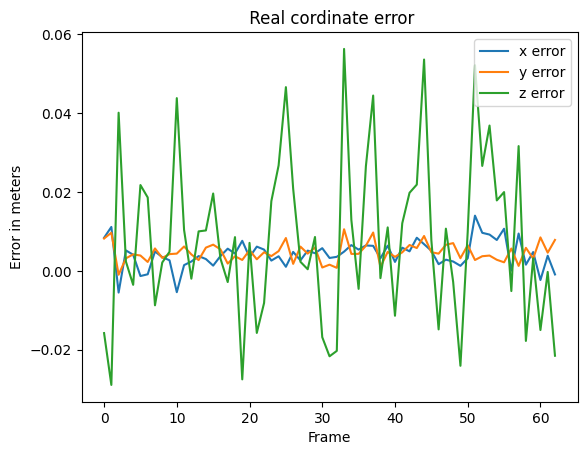

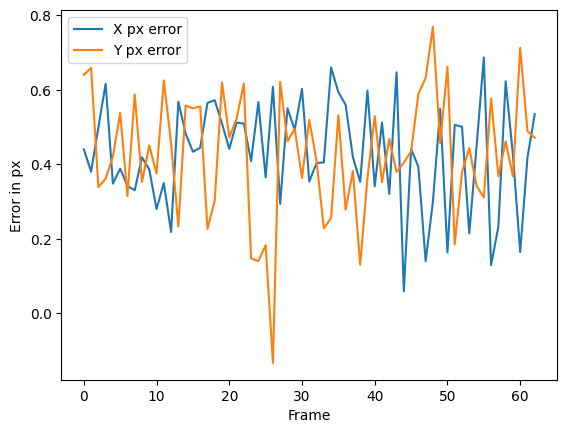

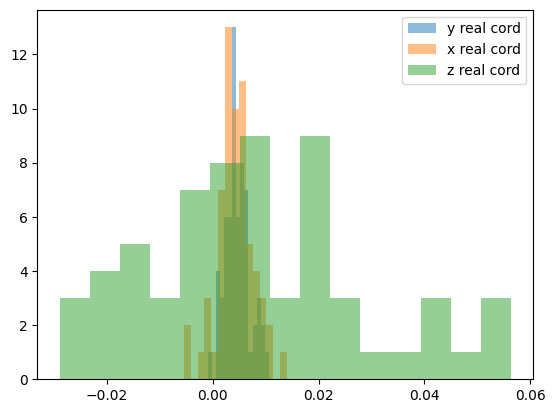

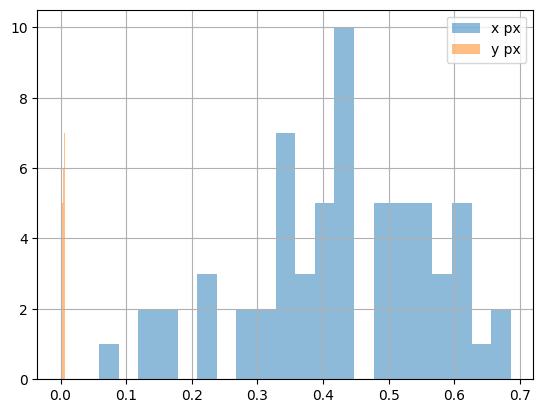

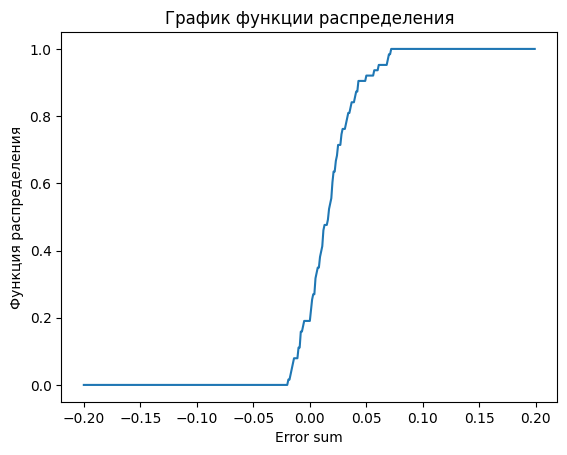

In [37]:
DeleteTrash(r"./BallDetectorLogSobelVectorDotVideo63WithOffset1QMore.txt") 
FindCord63SobelOffset = np.loadtxt(r"./BallDetectorLogSobelVectorDotVideo63WithOffset1QMore.txt")
BlenderCord63SobelOffset  = np.loadtxt(r"./LogBlenderCoord63video.txt", delimiter=',')

ErrorEstimation(FindCord63SobelOffset, BlenderCord63SobelOffset,rvecR,T,cameraMatrix,distCoeffs,draw=bool)




#Canny

DeleteTrash(r"./BallDetectorLogCannyVideo63.txt") 
FindCord63 = np.loadtxt(r"./BallDetectorLogCannyVideo63.txt")

BlenderCord63  = np.loadtxt(r"./LogBlenderCoord63video.txt", delimiter=',')

ErrorEstimation(FindCord63, BlenderCord63,rvecR,T,cameraMatrix,distCoeffs,draw=bool)

xyz Real cordinate mean: 
-0.009364388304066575
0.006057153878394237
0.023245190476190475
------------------
Px cordinate mean
-0.21641522162612892
0.6146787248462688
 
max px error: x =  4.5705879643255685  y =  8.683299339227915 

Statistics stdev:   1.8656928884871626  error in px
Statistics stdev:   0.013282469286872095  error x
Statistics stdev:   0.018666837168309313  error y
Statistics stdev:   0.061023909881465416  error z
-------------------------------------------------------------------
mean xyz abs: 
0.009364388304066575
0.006057153878394237
0.023245190476190475


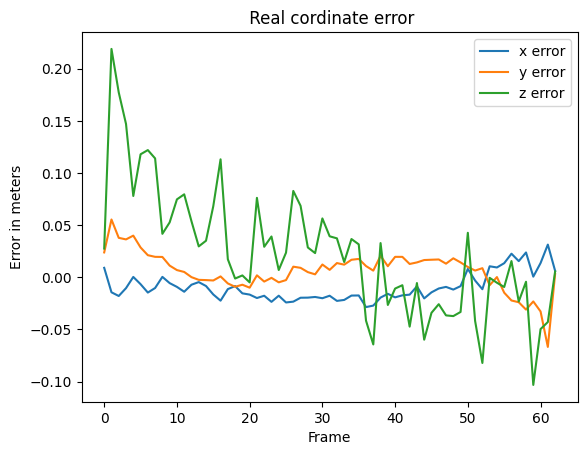

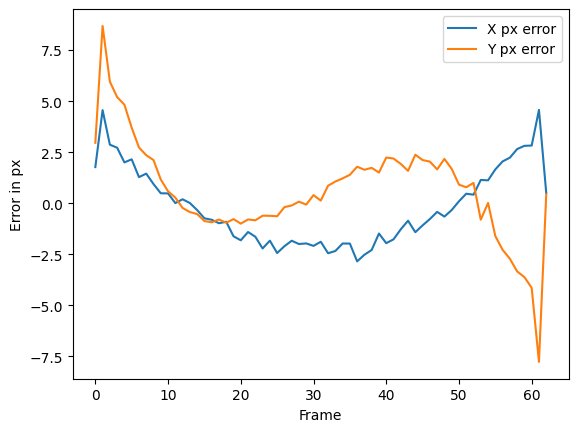

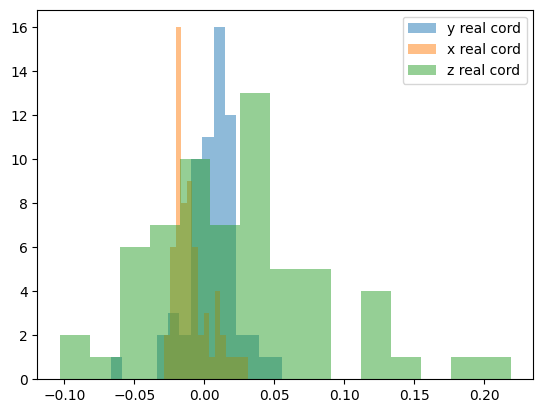

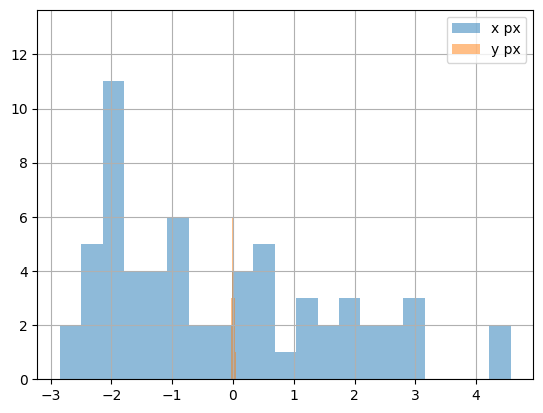

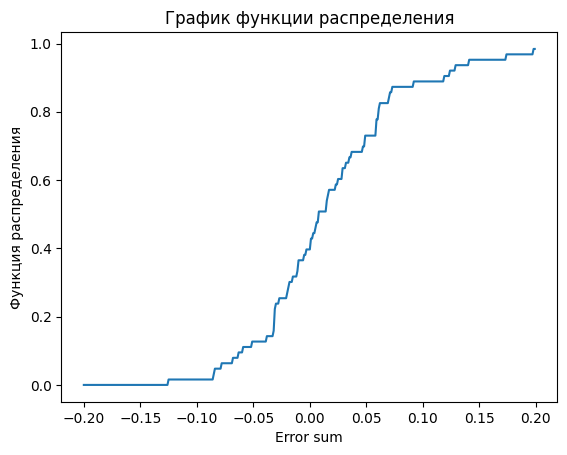

In [32]:
DeleteTrash(r"./BallDetectorLogSobel63MoutinBlur05_03.txt") 
FindCord63SobelOffset = np.loadtxt(r"./BallDetectorLogSobel63MoutinBlur05_03.txt")
BlenderCord63SobelOffset  = np.loadtxt(r"./LogBlenderCoord63video.txt", delimiter=',')

ErrorEstimation(FindCord63SobelOffset, BlenderCord63SobelOffset,rvecR,T,cameraMatrix,distCoeffs,draw=bool)



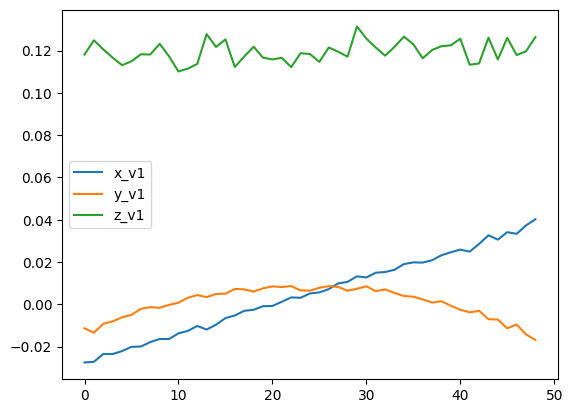

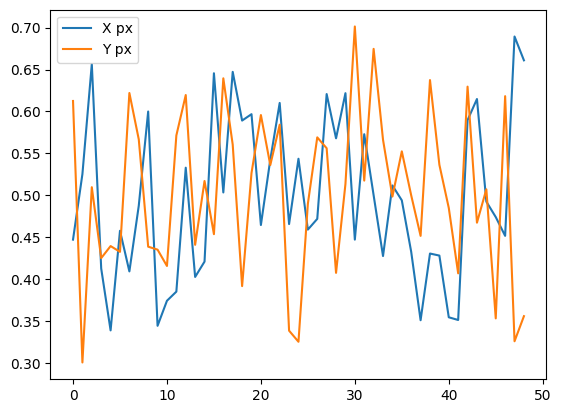

xyz Real cordinate mean: 
0.016843441227203656
0.006127502820716177
0.11943361224489807
------------------
Px cordinate mean
0.49837790928493825
0.502474778455837


In [33]:

imageFindPoint, jacobianProjectFind = cv2.projectPoints(FindCord, rvecR, T, cameraMatrix, distCoeffs)
imageBlenderPoint, jacobianProjectBlender = cv2.projectPoints(BlenderCord, rvecR, T, cameraMatrix, distCoeffs)

pixelError = imageBlenderPoint - imageFindPoint
xValuesPx = pixelError[:,0,0]
yValuesPx = pixelError[:,0,1]

xErrorFindCord = FindCord[:,0] - BlenderCord[:,0]
yErrorFindCord = FindCord[:,1] - BlenderCord[:,1]
zErrorFindCord = FindCord[:,2] - BlenderCord[:,2]

plt.plot(xErrorFindCord, label = 'x_v1')
plt.plot(yErrorFindCord, label = "y_v1")
plt.plot(zErrorFindCord, label = "z_v1")
plt.legend()
plt.show()

plt.plot(xValuesPx, label = "X px")
plt.plot(yValuesPx, label = "Y px")
plt.legend()
plt.show()

print ("xyz Real cordinate mean: ")
print (np.mean(abs(xErrorFindCord)))
print (np.mean(abs(yErrorFindCord)))
print (np.mean(abs(zErrorFindCord)))
print("------------------")
print("Px cordinate mean")
print(np.mean(abs(xValuesPx)))
print(np.mean(abs(yValuesPx)))

# 3-D map

AttributeError: Line2D.set() got an unexpected keyword argument 'z'

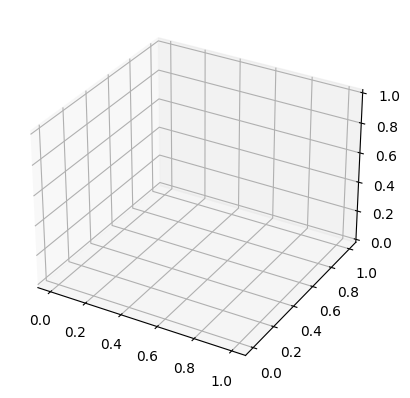

In [34]:
import pandas as pd
import seaborn as sns

# Создаем список точек
points = [(1,2,3), (2,3,4), (3,4,5)]

# Создаем датафрейм Pandas из списка
df = pd.DataFrame(points, columns=['x', 'y', 'z'])

# Cоздаем график с помощью Seaborn
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sns.lineplot(x='x', y='y', z='z', data=df, ax=ax)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()



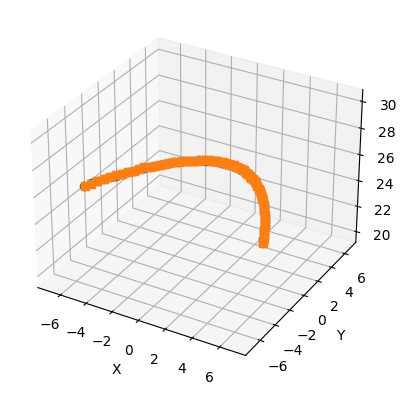

In [ ]:

# Define the data points
x_blender = BlenderCord63SobelOffset[:,0] # x-coordinates of the points
y_blender = BlenderCord63SobelOffset[:,1] # y-coordinates of the points
z_blender = BlenderCord63SobelOffset[:,2] # z-coordinates of the points

x_find = FindCord63SobelOffset[:,0] # x-coordinates of the points
y_find = FindCord63SobelOffset[:,1] # y-coordinates of the points
z_find = FindCord63SobelOffset[:,2] # z-coordinates of the points
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_blender, y_blender, z_blender, '-o')

ax.plot(x_find, y_find, z_find, "-s")
# Set the axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set the x and y limits
plt.axis('equal')


# Rotate the plot
#ax.view_init(elev=90, azim=-90)
# Show the plot
plt.show()
